# Linear Regression using Tensorflow
### KO, HYEONG-IL
### 2017/09/05

In [1]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

<type 'list'>
(42, 2)


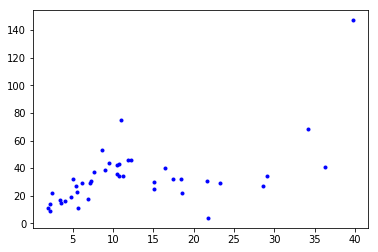

In [2]:
# data preprocessing

from fire_theft import *

print(type(fire_theft_data))

data = np.array(fire_theft_data)
print(data.shape)

x_data = data[:, 0]
y_data = data[:, 1]

plt.plot(x_data, y_data, 'b.')

In [3]:
### Create model

In [4]:
# placeholder
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

In [5]:
# Variable
w = tf.Variable(0, dtype=tf.float32, name='weight')
b = tf.Variable(0, dtype=tf.float32)

In [6]:
# Linear function
y_pred = tf.multiply(w, x) + b

In [7]:
# loss function
loss = tf.reduce_sum(tf.pow(y_pred-y, 2))/tf.constant(2, dtype=tf.float32)

In [8]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
updateModel = optimizer.minimize(loss)

[Info] trained value: w= 1.47189 b= 14.1017


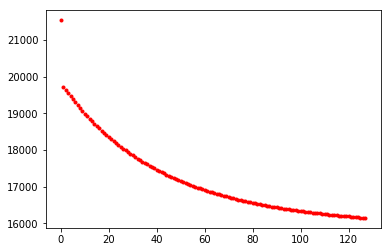

In [9]:
trained_weight = 0.0
trained_bias = 0.0

#
#  Session run
#
with tf.Session() as sess:
    # tensorflow variable init
    sess.run(tf.global_variables_initializer())
    
    for i in range(128):
#         print("[Info] ", "epoch:", i)

        total_loss = 0.0
        
        for x_elem, y_elem in fire_theft_data:
            #  sess.run(...) for training
#             print("[Info]", "x:", x_elem, "\t", "y:", y_elem)
            _, err = sess.run([updateModel, loss], feed_dict={x:x_elem, y:y_elem})
            total_loss += err
            
#         print("loss:", total_loss)
        plt.plot(i, total_loss, 'r.')

    trained_weight = sess.run(w)
    trained_bias = sess.run(b)
    
    # print out trained variables
    print('[Info] trained value: w=', trained_weight, 'b=', trained_bias)

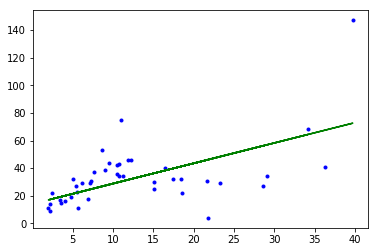

In [10]:
#Visualize the result

x_data = data[:, 0]
y_data = data[:, 1]

plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, trained_weight*x_data+trained_bias, 'g-')
